In [1]:
from keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

C:\Users\DELL\AppData\Local\Temp\ipykernel_13440\414789252.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lens)


467.0


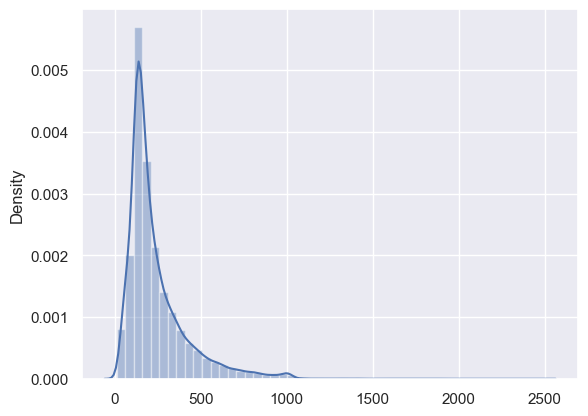

In [4]:
lens = [len(x) for x in X]
sns.distplot(lens)
print(np.percentile(lens, 90))

In [3]:
vocab_size = 10000
embedding_dim = 50 

(x, y), _ = imdb.load_data(num_words=vocab_size)

In [6]:
from keras.preprocessing import sequence

maxlen = 500
x = sequence.pad_sequences(x, maxlen=maxlen)

Creating an RNN model sequentially starting with an embedding layer, the vocabulary size and embedding dimensions. LSTM layer is added with the embedding dimension as its input size. Lastly, a dense layer with a single neuron and a sigmoid activation function is included. 

In [7]:
from keras.layers import LSTM, Dense, Embedding
from keras.models import Sequential

RNN = Sequential([
    Embedding(vocab_size, embedding_dim), 
    LSTM(embedding_dim), 
    Dense(1, activation='sigmoid')
])

RNN.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 50)          500000    
                                                                 
 lstm (LSTM)                 (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 520251 (1.98 MB)
Trainable params: 520251 (1.98 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compiling the RNN model with the optimizer as 'adam', the loss function as 'binary_crossentropy', and the metric for evaluation as accuracy ('acc'). Training the model using the `fit` method with input data `x` and corresponding labels `y`, running for 5 epochs and utilizing a validation split of 10%. 

In [9]:
RNN.compile(optimizer='adam', loss='binary_crossentropy', 
            metrics=['acc'])

history = RNN.fit(x, y, epochs=5, 
                  validation_split=0.1)

Epoch 1/5


704/704 [==============================] - 222s 305ms/step - loss: 0.4115 - acc: 0.8075 - val_loss: 0.3798 - val_acc: 0.8340
Epoch 2/5
704/704 [==============================] - 216s 306ms/step - loss: 0.3341 - acc: 0.8646 - val_loss: 0.3477 - val_acc: 0.8640
Epoch 3/5
704/704 [==============================] - 213s 302ms/step - loss: 0.2297 - acc: 0.9123 - val_loss: 0.3517 - val_acc: 0.8564
Epoch 4/5
704/704 [==============================] - 219s 311ms/step - loss: 0.1815 - acc: 0.9343 - val_loss: 0.3277 - val_acc: 0.8736
Epoch 5/5
704/704 [==============================] - 242s 344ms/step - loss: 0.1612 - acc: 0.9405 - val_loss: 0.4374 - val_acc: 0.8556
